In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [5]:
# Load your dataset (assuming it's stored in a CSV file)
df = pd.read_csv('new_dataset.csv')


In [6]:
df.info


<bound method DataFrame.info of      SYMBOL \n NAME OF THE ACQUIRER/DISPOSER \n  \
0       360ONE                    Vishal Khanna   
1       360ONE                     Meer Thakker   
2       360ONE                  Anup Maheshwari   
3       360ONE               ARZAN FALI TAMBOLY   
4       360ONE                      Chetan Naik   
...        ...                              ...   
2081    5PAISA              MAYUR PREMJI DEDHIA   
2082    5PAISA                 PRAKARSH GAGDANI   
2083    5PAISA                 PRAKARSH GAGDANI   
2084    5PAISA              MAYUR PREMJI DEDHIA   
2085    5PAISA                 PRAKARSH GAGDANI   

               CATEGORY OF PERSON \n TYPE OF SECURITY (PRIOR) \n  \
0                                  -               Equity Shares   
1                                  -               Equity Shares   
2                                  -               Equity Shares   
3                                  -               Equity Shares   
4              

In [7]:
print(df.columns)

Index(['SYMBOL \n', 'NAME OF THE ACQUIRER/DISPOSER \n',
       'CATEGORY OF PERSON \n', 'TYPE OF SECURITY (PRIOR) \n',
       '% SHAREHOLDING (PRIOR) \n',
       'NO. OF SECURITIES (ACQUIRED/DISPLOSED) \n',
       'VALUE OF SECURITY (ACQUIRED/DISPLOSED) \n',
       'ACQUISITION/DISPOSAL TRANSACTION TYPE \n', 'NO. OF SECURITY (POST) \n',
       'DATE OF ALLOTMENT/ACQUISITION FROM \n', 'MODE OF ACQUISITION \n',
       'NUMBER OF UNITS/CONTRACT LOT SIZE  (SELL) \n', 'is_insider'],
      dtype='object')


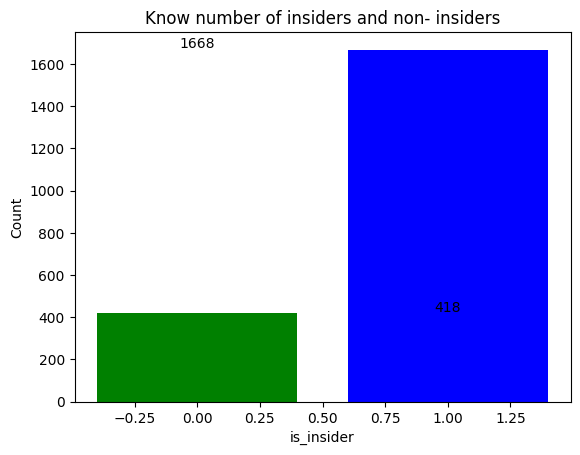

In [8]:
# Count the occurrences of each value in the binary column
value_counts = df['is_insider'].value_counts()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values, color=['blue', 'green'])

# Add labels and title
plt.xlabel('is_insider')
plt.ylabel('Count')
plt.title('Know number of insiders and non- insiders')

# Add value labels on top of each bar
for i, v in enumerate(value_counts.values):
    plt.text(i, v + 10, str(v), ha='center')

# Show the plot
plt.show()

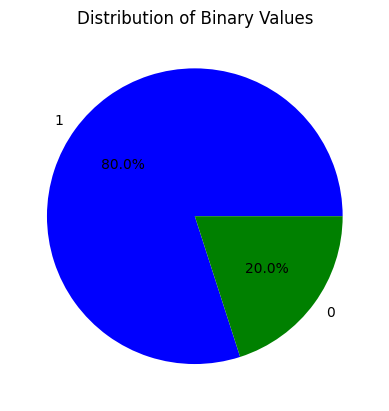

In [9]:
# Create a pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', colors=['blue', 'green'])

# Add title
plt.title('Distribution of Binary Values')

# Show the plot
plt.show()

In [10]:
df

,SYMBOL \n,NAME OF THE ACQUIRER/DISPOSER \n,CATEGORY OF PERSON \n,TYPE OF SECURITY (PRIOR) \n,% SHAREHOLDING (PRIOR) \n,NO. OF SECURITIES (ACQUIRED/DISPLOSED) \n,VALUE OF SECURITY (ACQUIRED/DISPLOSED) \n,ACQUISITION/DISPOSAL TRANSACTION TYPE \n,NO. OF SECURITY (POST) \n,DATE OF ALLOTMENT/ACQUISITION FROM \n,MODE OF ACQUISITION \n,NUMBER OF UNITS/CONTRACT LOT SIZE (SELL) \n,is_insider
0,360ONE,Vishal Khanna,-,Equity Shares,0.01,1952.0,1285037,Sell,16000,2023-12-04,Market Sale,0,0
1,360ONE,Meer Thakker,-,Equity Shares,0.02,3724.0,2643705,Sell,72000,2023-12-29,Market Sale,0,0
2,360ONE,Anup Maheshwari,-,Equity Shares,0.04,22495.0,15932702,Sell,108000,2023-12-29,Market Sale,0,0
3,360ONE,ARZAN FALI TAMBOLY,-,Equity Shares,0.02,31512.0,20927157,Sell,30000,2023-12-27,Market Sale,0,0
4,360ONE,Chetan Naik,-,Equity Shares,0.00,13500.0,9520500,Sell,2000,2023-12-28,Market Sale,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,5PAISA,MAYUR PREMJI DEDHIA,Employees/Designated Employees,Equity Shares,0.10,1600.0,731620,Sell,30400,2023-10-30,Market Sale,0,0
2082,5PAISA,PRAKARSH GAGDANI,Key Managerial Personnel,Equity Shares,0.16,24761.0,11251931,Sell,23670,2023-10-23,Market Sale,0,0
2083,5PAISA,PRAKARSH GAGDANI,Key Managerial Personnel,Equity Shares,0.08,10589.0,4555820,Sell,13081,2023-10-25,Market Sale,0,0
2084,5PAISA,MAYUR PREMJI DEDHIA,Employees/Designated Employees,Equity Shares,0.11,3000.0,1306263,Sell,32000,2023-10-23,Market Sale,0,0


In [11]:
#new2_df = new_df.dropna(subset=['NO. OF SECURITY (PRIOR) \r\n'])
#new2_df = new_df[new_df['NO. OF SECURITY (PRIOR) \r\n'] != 'Nil']


In [12]:
nan_values = df.isna().any().any()

if nan_values:
    print("There are NaN values in the dataset.")
else:
    print("There are no NaN values in the dataset.")

There are no NaN values in the dataset.


In [13]:
df = df.dropna(axis=0)

In [14]:
# Assuming 'is_insider' is your target variable and the rest are features
X = df.drop(columns=['is_insider'])  # Features
y = df['is_insider']  # Target variable

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Concatenate the training and testing sets to ensure consistent encoding
concatenated_df = pd.concat([X_train, X_test], axis=0)

# One-hot encode categorical variables
concatenated_encoded = pd.get_dummies(concatenated_df)

# Split back into training and testing sets
X_train_encoded = concatenated_encoded.iloc[:len(X_train)]
X_test_encoded = concatenated_encoded.iloc[len(X_train):]

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


In [17]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

In [18]:
# Train the model
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [19]:
# Predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9832535885167464


In [21]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        98
           1       0.98      1.00      0.99       320

    accuracy                           0.98       418
   macro avg       0.99      0.96      0.98       418
weighted avg       0.98      0.98      0.98       418



In [22]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 91   7]
 [  0 320]]


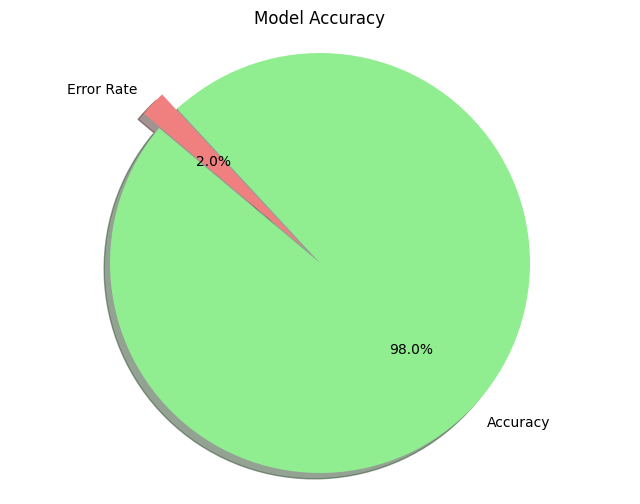

<Figure size 640x480 with 0 Axes>

In [24]:
# Define accuracy and error rate
accuracy = 98
error_rate = 100 - accuracy
import matplotlib.pyplot as plt

# Define labels and sizes for the pie chart
labels = ['Accuracy', 'Error Rate']
sizes = [accuracy, error_rate]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Explode the "Accuracy" slice

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Model Accuracy')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()
plt.savefig('logistic_accuracy.png')
